## Basic Stock Analysis 
#### Bryant Crocker 

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ffn
import holoviews as hv
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import display
init_notebook_mode(connected=True)
%matplotlib inline
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In order to pull in daily stock prices I will use the ffn library. The ffn library pulls in data from yahoo finance.  I will start on the first of Janauary 2010.  A few years after the 2008 recession.


I am looking at:

* Under Armour - UAA

* Nike - NKE 

* Adidas - ADS

* Vans Footwear Company - VFC


In [72]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
prices = ffn.get('nke,ads,vfc,uaa', start='2010-01-01')
#Use the pd.head() method to get an idea of what the data looks like
prices.head()

,nke,ads,vfc,uaa
Date,,,,
2010-01-04,12.217500,64.652290,11.234499,3.51000
2010-01-05,12.266110,64.779861,11.448840,3.61500
2010-01-06,12.191328,65.103653,11.402914,3.69500
2010-01-07,12.310980,65.702194,11.623373,3.65125
2010-01-08,12.286675,66.408684,11.562134,3.64375


A simple plot of historical prices.  Their seems to be a fair deal of variabilty around the price of Adidas. 

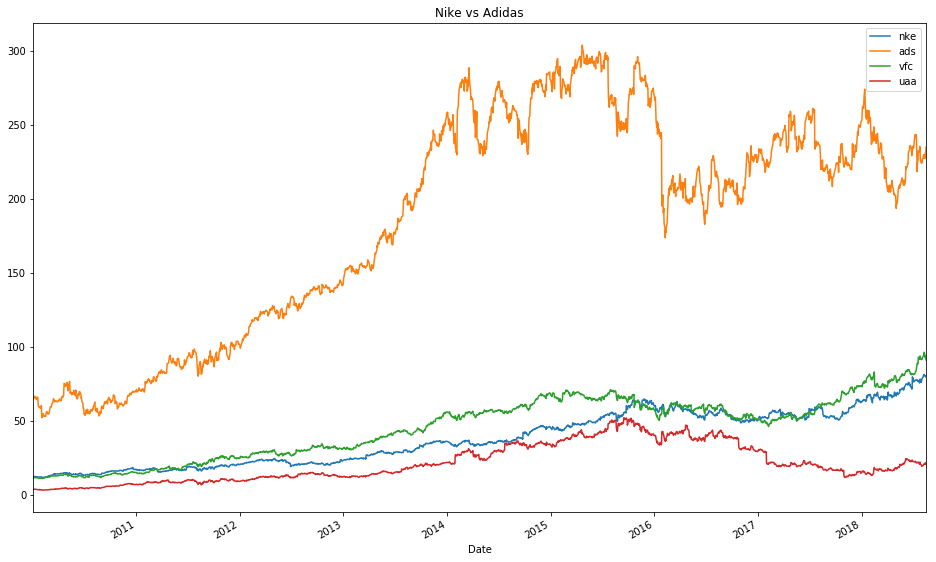

In [73]:
#plot a simply line plot to show the prices of the two assets over time.

prices[['nke', 'ads','vfc','uaa']].plot(figsize=(16,10))
plt.legend()
plt.title("Nike vs Adidas")
plt.show()

Under armour has the highest returns on average.  Note that the x-axis of the histograms are not on the same scale.

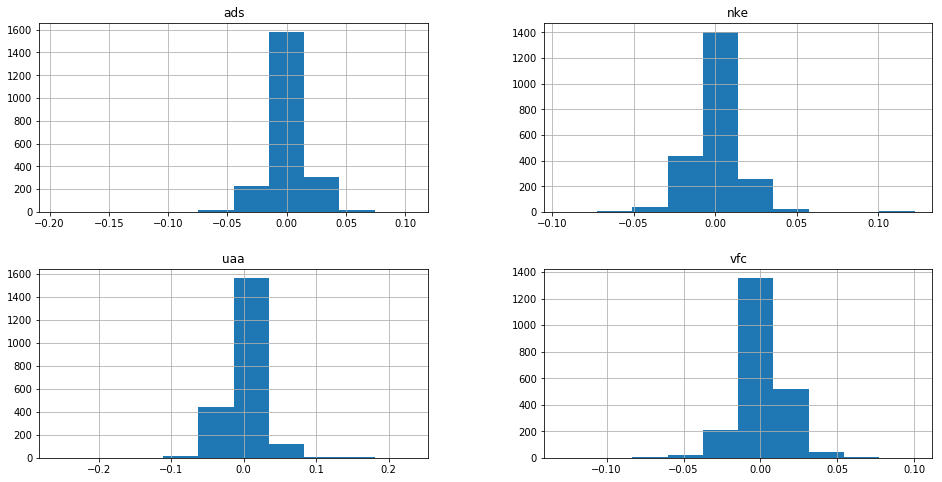

In [74]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(16,8))

nke    0.000976
ads    0.000742
vfc    0.001079
uaa    0.001160
dtype: float64

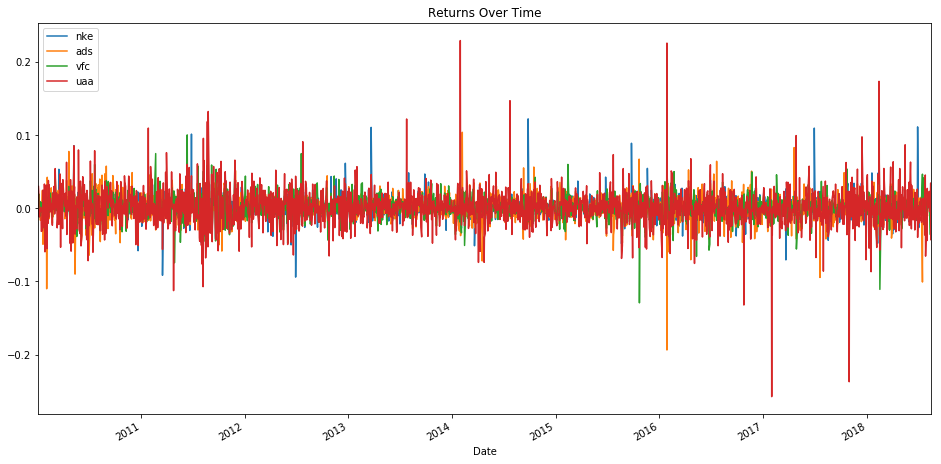

In [75]:
returns.plot(figsize=(16,8))
plt.title("Returns Over Time")
returns.mean()

#  Forecasts:

To forcast future closing values of the selected securities, I will use the Facebook's *prophet* forecasting api.  Prophet fits a general additive model using time series data.   

## Under Armor 

In [76]:
UnderArmor = prices['uaa']

In [77]:
UnderArmor = pd.DataFrame(UnderArmor).reset_index().rename(columns={"Date": "ds", "uaa": "y"})
#UnderArmor['y'] = UnderArmor['y'].to_returns()

In [78]:
from fbprophet import Prophet

m = Prophet()
m.fit(UnderArmor)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2531,2019-08-12,7.199764,1.863229,13.177648
2532,2019-08-13,7.065798,1.597172,13.213827
2533,2019-08-14,6.988523,1.213970,12.826143
2534,2019-08-15,6.972645,1.058314,12.632671
2535,2019-08-16,6.893145,1.033480,13.377411


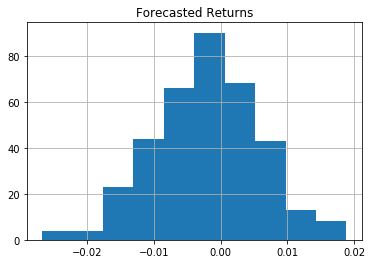

In [79]:
today = pd.to_datetime('today')
UnderArmorf = forecast[forecast.ds > today]
UnderArmorf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

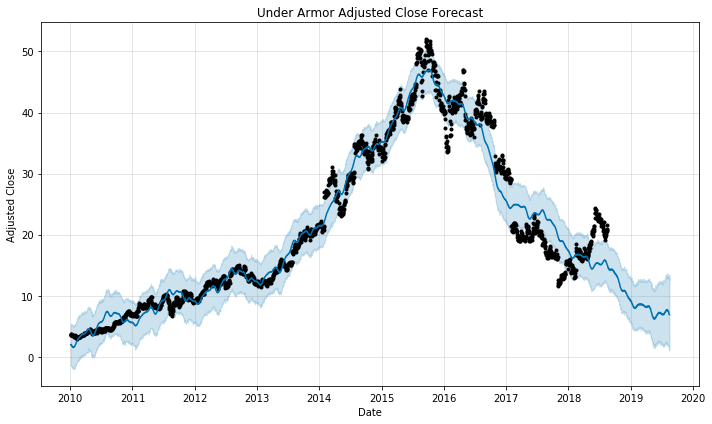

In [80]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Under Armor Adjusted Close Forecast")
plt.tight_layout()
plt.savefig("UnderArmor.png")
plt.show()

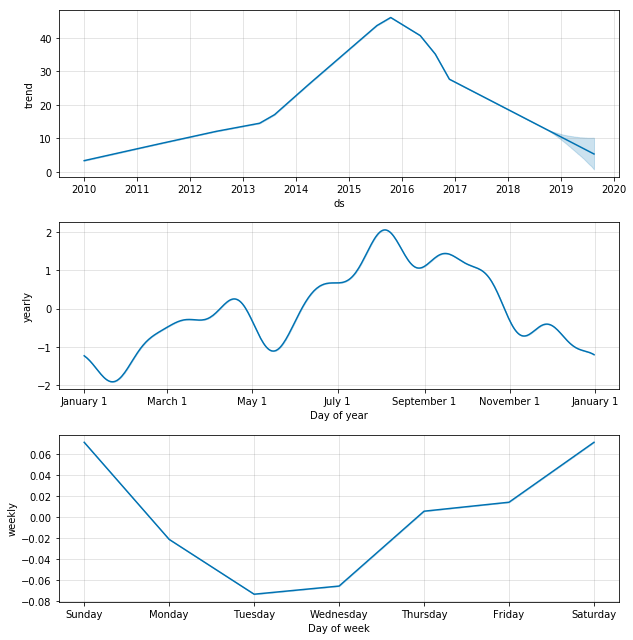

In [81]:
# Python
fig2 = m.plot_components(forecast)

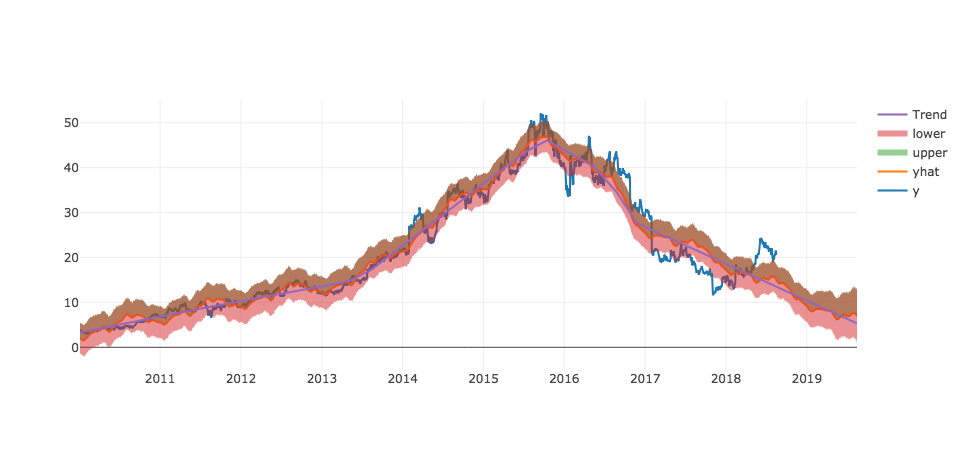

In [82]:
iplot([
    go.Scatter(x=UnderArmor['ds'], y=UnderArmor['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

# Nike Forecast 

In [17]:
Nike = prices['nke']
Nike = pd.DataFrame(Nike).reset_index().rename(columns={"Date": "ds", "nke": "y"})
m = Prophet()
m.fit(Nike)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2531,2019-08-12,86.565791,78.400229,94.900681
2532,2019-08-13,86.485883,78.932840,94.186121
2533,2019-08-14,86.421228,78.593322,94.596662
2534,2019-08-15,86.400944,78.448677,94.286317
2535,2019-08-16,86.404088,78.592350,94.527547


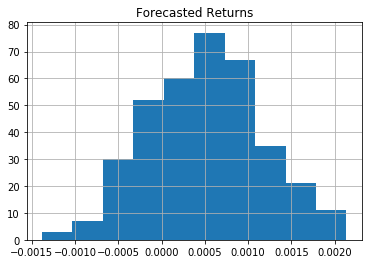

In [18]:
today = pd.to_datetime('today')
Nikef = forecast[forecast.ds > today]
Nikef['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

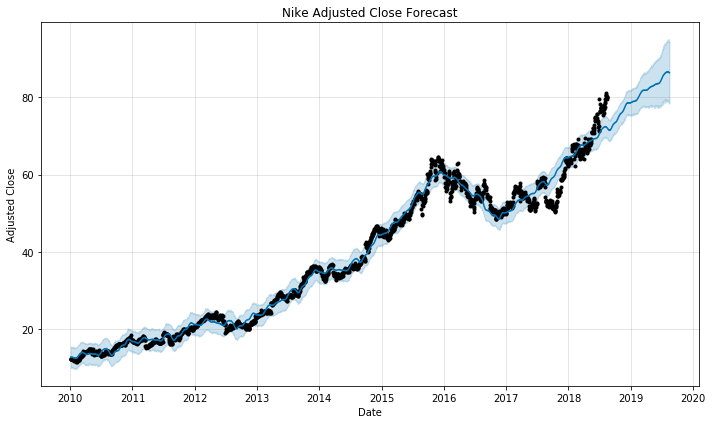

In [19]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Nike Adjusted Close Forecast")
plt.savefig('nike.png')
plt.tight_layout()
plt.show()

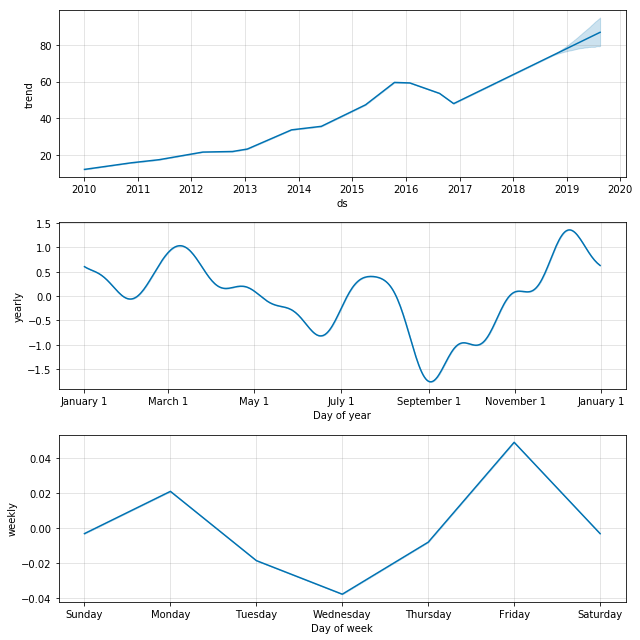

In [20]:
# Python
fig2 = m.plot_components(forecast)

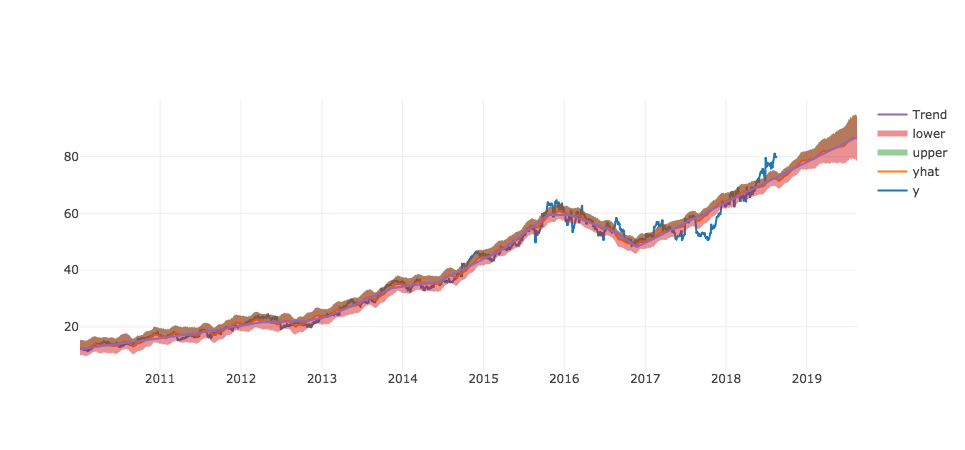

In [21]:
iplot([
    go.Scatter(x=Nike['ds'], y=Nike['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

# Adidas Forecast

In [22]:
Adidas = prices['ads']
Adidas = pd.DataFrame(Adidas).reset_index().rename(columns={"Date": "ds", "ads": "y"})
Adidas['y'] = np.log(Adidas['y'])
m = Prophet()
m.fit(Adidas)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2531,2019-08-12,5.388282,4.986944,5.741578
2532,2019-08-13,5.385470,4.983736,5.748145
2533,2019-08-14,5.384394,4.968318,5.748430
2534,2019-08-15,5.382223,4.968564,5.760302
2535,2019-08-16,5.379032,4.988289,5.741895


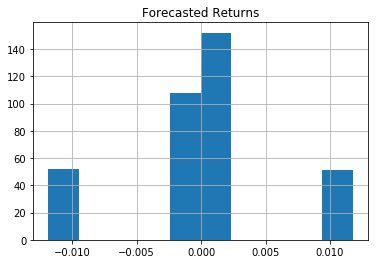

In [23]:
today = pd.to_datetime('today')
Adidasf = forecast[forecast.ds > today]
Adidasf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

In [24]:
forecast.set_index('ds', inplace = True)
forecast2 = np.expm1(forecast[['yhat', 'yhat_lower', 'yhat_upper']])
forecast2.reset_index(inplace = True)
forecast2.head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-04,58.931005,55.149396,62.956123
1,2010-01-05,59.067436,54.931006,63.395284
2,2010-01-06,59.293865,55.349541,63.140817
3,2010-01-07,59.437134,55.348818,63.318060
4,2010-01-08,59.498442,55.541527,63.626843


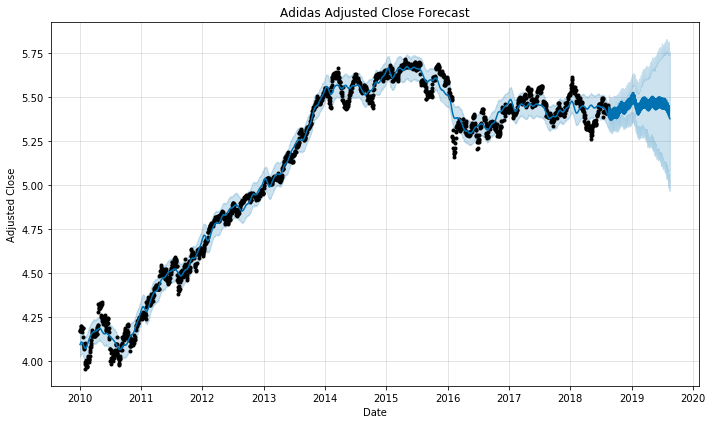

In [25]:
fig1 = m.plot(forecast.reset_index())
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Adidas Adjusted Close Forecast")
plt.tight_layout()
plt.savefig("Adidas.png")
plt.show()

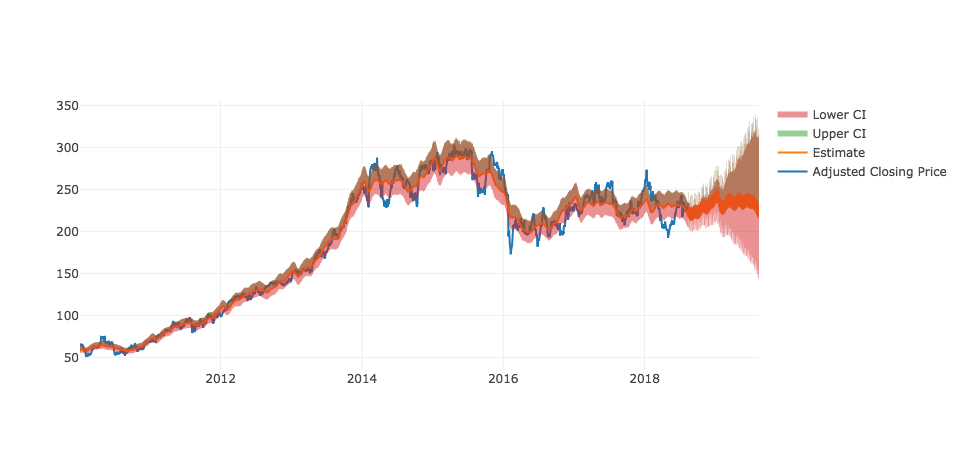

In [26]:
Adidas['y'] = np.expm1(Adidas['y'])
iplot([
    go.Scatter(x=Adidas['ds'], y=Adidas['y'], name='Adjusted Closing Price'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat'], name='Estimate'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat_upper'], fill='tonexty', mode='none', name='Upper CI'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat_lower'], fill='tonexty', mode='none', name='Lower CI')
    #go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

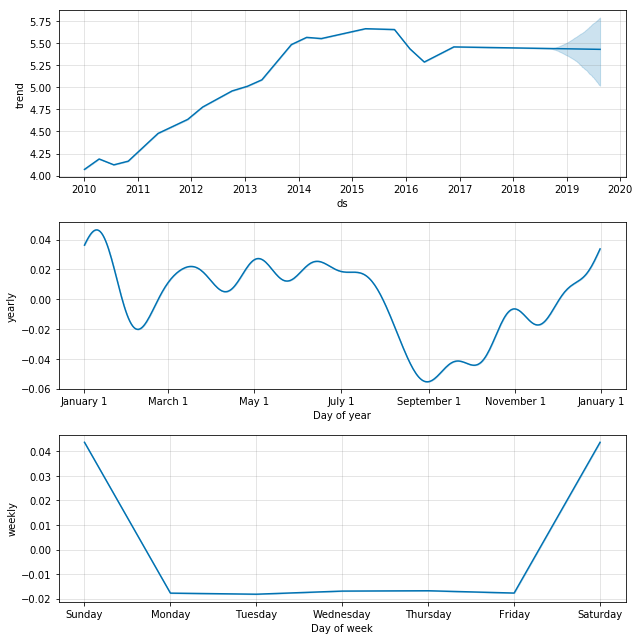

In [27]:
# Python
fig2 = m.plot_components(forecast.reset_index())

# Vans Footwear Forecast

In [28]:
Vans = prices['vfc']
Vans = pd.DataFrame(Vans).reset_index().rename(columns={"Date": "ds", "vfc": "y"})
m = Prophet()
m.fit(Vans)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2531,2019-08-12,111.052921,97.948524,124.915833
2532,2019-08-13,111.052085,98.392702,124.485337
2533,2019-08-14,111.024584,97.567074,125.361352
2534,2019-08-15,111.011038,97.645971,125.346584
2535,2019-08-16,110.978431,97.810674,125.119352


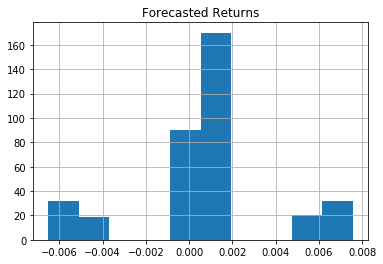

In [29]:
today = pd.to_datetime('today')
vansf = forecast[forecast.ds > today]
vansf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

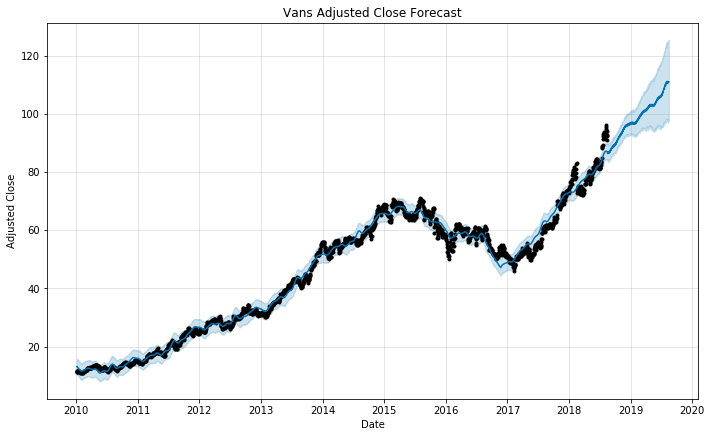

In [30]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Vans Adjusted Close Forecast")
plt.savefig("vans.png")
plt.show()

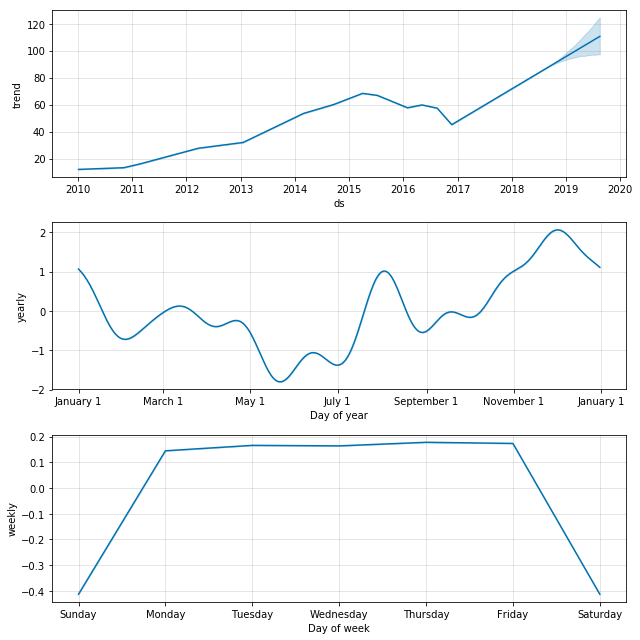

In [31]:
# Python
fig2 = m.plot_components(forecast)

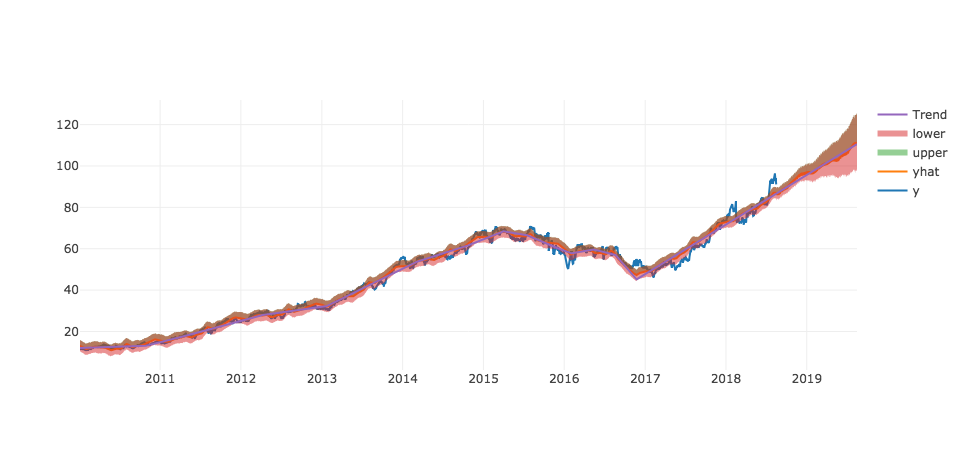

In [32]:
iplot([
    go.Scatter(x=Vans['ds'], y=Vans['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

In [33]:
Vans.head()

,ds,y
0,2010-01-04,11.234499
1,2010-01-05,11.448840
2,2010-01-06,11.402914
3,2010-01-07,11.623373
4,2010-01-08,11.562134
